In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [27]:
#6.4 c
def fcn(x):
    ep=np.e**x
    return np.log((ep+(1/ep))/2),ep

def qfcn(x,y):
    fn,ep=fcn(x)
    dfn=(ep-(1/ep))/(ep+(1/ep))
    return fn+dfn*(x-y)+0.5*(x-y)**2

In [30]:
x=np.arange(-10,10,0.01)
qval=qfcn(x,-2)
qval2=qfcn(x,3)
yval,ep=fcn(x)

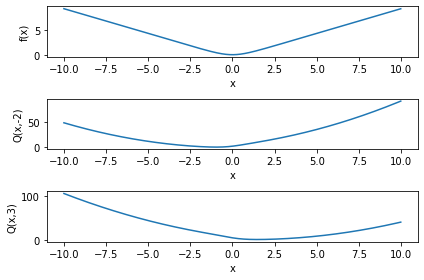

In [37]:
plt.figure()
plt.subplot(3,1,1)
plt.plot(x,yval)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.subplot(3,1,2)
plt.plot(x,qval)
plt.xlabel('x')
plt.ylabel('Q(x,-2)')
plt.subplot(3,1,3)
plt.plot(x,qval2)
plt.xlabel('x')
plt.ylabel('Q(x,3)')
plt.tight_layout()
plt.savefig('4c.png')

In [58]:
#6.4 f
def iter_converge(x0):
    xold=x0
    x=[]
    ep=np.e**xold
    xnew=xold-(ep-(1/ep))/(ep+(1/ep))
    x.append(xnew)
    for i in range(0,100):
        xold=xnew
        ep=np.e**xold
        xnew=xold-(ep-(1/ep))/(ep+(1/ep))
        x.append(xnew)
    return x
    

In [59]:
x=iter_converge(-2)
x1=iter_converge(3)

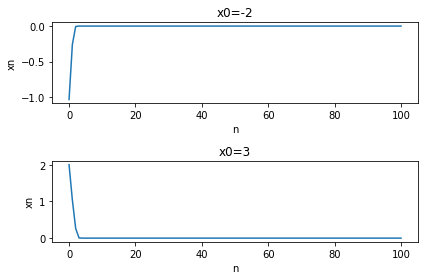

In [60]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(x)
plt.title('x0=-2')
plt.xlabel('n')
plt.ylabel('xn')
plt.subplot(2,1,2)
plt.plot(x1)
plt.title('x0=3')
plt.xlabel('n')
plt.ylabel('xn')
plt.tight_layout()
plt.savefig('4f.png')

In [61]:
# 6.4 g
def minima_converge(x0):
    xold=x0
    x=[]
    ep=np.e**(2*xold)
    xnew=xold-(ep-1/ep)/4
    x.append(xnew)
   # while (abs(xnew-xold)>0.1):
    for i in range(0,1):
        xold=xnew
        ep=np.e**(2*xold)
        xnew=xold-(ep-1/ep)/4
        x.append(xnew)
    return x

In [64]:
x=minima_converge(-2)
x1=minima_converge(3)

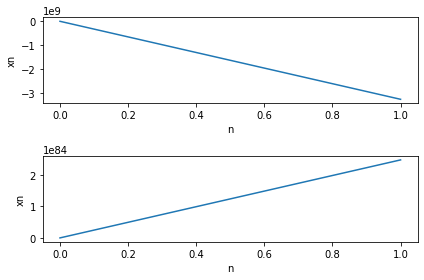

In [66]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(x)
plt.xlabel('n')
plt.ylabel('xn')
plt.subplot(2,1,2)
plt.plot(x1)
plt.xlabel('n')
plt.ylabel('xn')
plt.tight_layout()
plt.savefig('4g.png')


In [16]:
#6.4 g upper bound
def upper_bound(x):
    modx=abs(x)
    ep=np.e**(2*x)
    modx1=abs(x-(ep-(1/ep))/4)
    return modx,modx1

In [17]:
x=np.arange(-1.5,1.5,0.00001)
x0,x1=upper_bound(x)

C:\Users\mishr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  
C:\Users\mishr\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


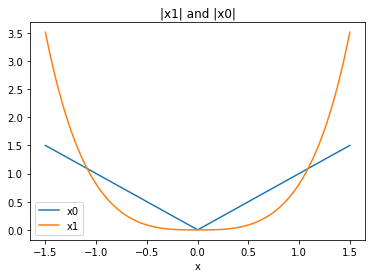

In [18]:
plt.figure()
plt.plot(x,x0,x,x1)
plt.title('|x1| and |x0|')
plt.xlabel('x')
plt.legend(['x0','x1'])
plt.savefig('x0bound.png')

In [96]:
error=[abs(l-m) for l,m in zip(x0,x1)]
x=np.arange(-1.5,1.5,0.00001)
for e,z in zip(error,x):
    if (e<0.00001):
        print(round(z,5))
        

-1.08866
-1e-05
0.0
1.08866


In [7]:
#6.4 h
def logcos(x):
    xval=np.zeros(np.shape(x)[0])
    for i in range(1,11):
        xval+=np.log(np.cosh(x+2/(i**0.5)))
    return 0.1*xval

In [10]:
x=np.arange(-50,50,0.00001)
xval=logcos(x)
print(x[np.argmin(xval)])

-0.9799799844403765


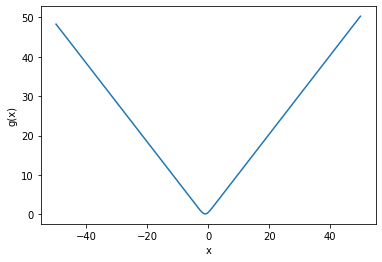

In [9]:


plt.figure()
plt.plot(x,xval)
plt.xlabel('x')
plt.ylabel('g(x)')
plt.savefig('4h.png')

In [22]:
#6.4 k
def tanh(x):
    ep=np.e**x
    return (ep-(1/ep))/(ep+(1/ep))

In [23]:
def iter_converge2(x0):
    xold=x0
    grad=0
    x=[]
    x.append(xold)
    for i in range(1,11):
        grad+=tanh(xold+2/i**0.5)
    xnew=xold-grad/10
    while (abs(xnew-xold)>0.00000001):
        xold=xnew
        grad=0
        for i in range(1,11):
            grad+=tanh(xold+2/i**0.5)
        xnew=xold-grad/10
        x.append(xnew)
    return xnew,x

In [29]:
xnew,x=iter_converge2(10)
print(np.round(xnew,5))


-0.97998


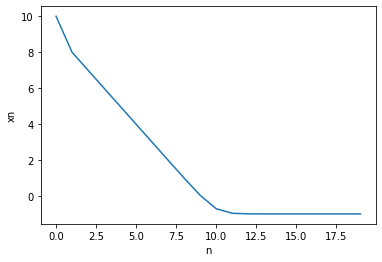

In [30]:
plt.figure()
plt.plot(x)
plt.xlabel('n')
plt.ylabel('xn')
plt.savefig('4k.png')
